# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [109]:
# your code here
import pandas as pd
import numpy as np

# 1. Read `tic-tac-toe.csv` into a dataframe.
data = pd.read_csv('tic-tac-toe.csv')
data.head()

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,x,x,x,x,o,o,x,o,o,True
1,x,x,x,x,o,o,o,x,o,True
2,x,x,x,x,o,o,o,o,x,True
3,x,x,x,x,o,o,o,b,b,True
4,x,x,x,x,o,o,b,o,b,True


In [110]:
# 2. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
print(data.info())

# All input features are categorical, therefore not usable by our NN. We need to convert them first.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
None


In [111]:
# Let's make sure we don't have upper case entries or typos and only the unique values needed
unique_values = pd.unique(data.values.ravel())
unique_values

# All good, values are x, o, b, True and False

array(['x', 'o', True, 'b', False], dtype=object)

In [112]:
# 3. Convert the categorical values to numeric in all columns.

# We will map x to 1, o to 0, b to 0.5, True to 1 and False to 0 so the data is numerical and normalised.
mapping = {'x': 1, 'o': 0, 'b': 0.5, False: 0, True: 1}
data_numerical = data.replace(mapping)

# check unique values now
unique_values = pd.unique(data_numerical.values.ravel())
print(unique_values)

data_numerical.head()

# Our dataframe now only contains 0, 1, -1, True and False values.

[1.  0.  0.5]


,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1
2,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1
3,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.5,0.5,1
4,1.0,1.0,1.0,1.0,0.0,0.0,0.5,0.0,0.5,1


In [113]:
# 4. Separate the inputs and output.
X = data_numerical.iloc[:,:-1]
y = data_numerical.iloc[:,-1]
print(X.shape, y.shape)
X.head(), y.head()


(958, 9) (958,)


(    TL   TM   TR   ML   MM   MR   BL   BM   BR
 0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0
 1  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0
 2  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0
 3  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.5  0.5
 4  1.0  1.0  1.0  1.0  0.0  0.0  0.5  0.0  0.5,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: class, dtype: int64)

In [114]:
# Check if dataset is balanced
unique_values = y.value_counts()
unique_values
# The dataset is not balanced, with twice as many samples of class 1 than class 0

class
1    626
0    332
Name: count, dtype: int64

In [115]:
# 5. Normalize the input data.
# Done during mapping at step 3

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

In [116]:
# your code here
from sklearn.model_selection import train_test_split

# 1. Split the training and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((670, 9), (670,), (288, 9), (288,))

Epoch 1/75
21/21 - 2s - 72ms/step - accuracy: 0.6254 - loss: 0.6552
Epoch 2/75
21/21 - 0s - 12ms/step - accuracy: 0.6463 - loss: 0.6156
Epoch 3/75
21/21 - 0s - 3ms/step - accuracy: 0.6836 - loss: 0.5913
Epoch 4/75
21/21 - 0s - 3ms/step - accuracy: 0.7134 - loss: 0.5660
Epoch 5/75
21/21 - 0s - 3ms/step - accuracy: 0.7358 - loss: 0.5490
Epoch 6/75
21/21 - 0s - 3ms/step - accuracy: 0.7537 - loss: 0.5353
Epoch 7/75
21/21 - 0s - 4ms/step - accuracy: 0.7567 - loss: 0.5254
Epoch 8/75
21/21 - 0s - 3ms/step - accuracy: 0.7507 - loss: 0.5169
Epoch 9/75
21/21 - 0s - 4ms/step - accuracy: 0.7522 - loss: 0.5119
Epoch 10/75
21/21 - 0s - 6ms/step - accuracy: 0.7552 - loss: 0.5053
Epoch 11/75
21/21 - 0s - 9ms/step - accuracy: 0.7567 - loss: 0.4994
Epoch 12/75
21/21 - 0s - 7ms/step - accuracy: 0.7567 - loss: 0.4943
Epoch 13/75
21/21 - 0s - 3ms/step - accuracy: 0.7687 - loss: 0.4879
Epoch 14/75
21/21 - 0s - 3ms/step - accuracy: 0.7701 - loss: 0.4844
Epoch 15/75
21/21 - 0s - 3ms/step - accuracy: 0.7806 - 

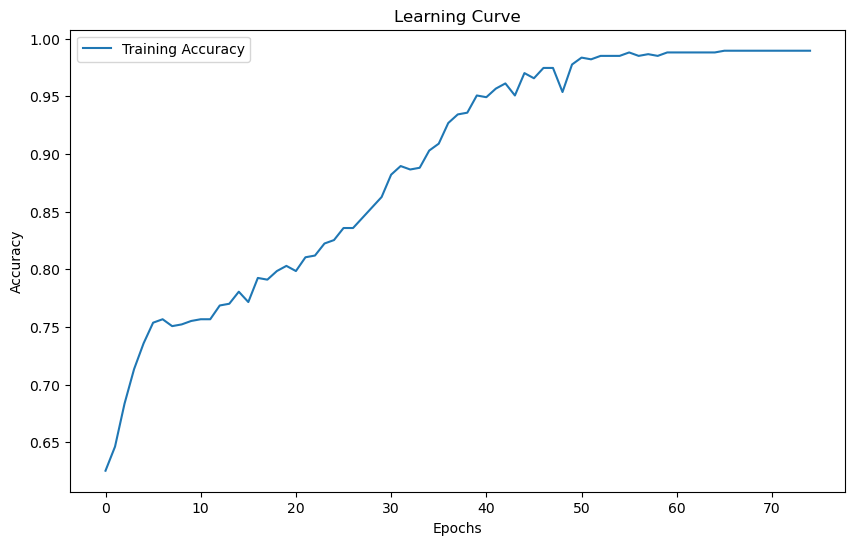

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.9895833333333334


In [168]:
from keras.models import Sequential
from keras.layers import Input, Dense
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# 2. Create a `Sequential` model.
model1 = Sequential()

# 3. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
model1.add(Input(shape=(X_train.shape[-1], )))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(2, activation='softmax'))  # True or False

# 4. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 5. Fit the training data.
history = model1.fit(X_train, y_train, epochs=100, verbose=2)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

# 6. Evaluate your neural network model with the test data.
y_pred = model1.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy}')


In [151]:
# 7. Save your model as `tic-tac-toe.model`.
model1.save('tic-tac-toe.keras')

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [152]:
# your code here
from keras.saving import load_model
model1 = load_model('tic-tac-toe.keras')

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

Epoch 1/150
21/21 - 1s - 70ms/step - accuracy: 0.6925 - loss: 0.5717
Epoch 2/150
21/21 - 0s - 9ms/step - accuracy: 0.7448 - loss: 0.5191
Epoch 3/150
21/21 - 0s - 3ms/step - accuracy: 0.7612 - loss: 0.5005
Epoch 4/150
21/21 - 0s - 3ms/step - accuracy: 0.7552 - loss: 0.4876
Epoch 5/150
21/21 - 0s - 3ms/step - accuracy: 0.7806 - loss: 0.4616
Epoch 6/150
21/21 - 0s - 2ms/step - accuracy: 0.8164 - loss: 0.4153
Epoch 7/150
21/21 - 0s - 3ms/step - accuracy: 0.8358 - loss: 0.3705
Epoch 8/150
21/21 - 0s - 2ms/step - accuracy: 0.8881 - loss: 0.3357
Epoch 9/150
21/21 - 0s - 3ms/step - accuracy: 0.9164 - loss: 0.2988
Epoch 10/150
21/21 - 0s - 2ms/step - accuracy: 0.9448 - loss: 0.2596
Epoch 11/150
21/21 - 0s - 2ms/step - accuracy: 0.9642 - loss: 0.2310
Epoch 12/150
21/21 - 0s - 3ms/step - accuracy: 0.9731 - loss: 0.1994
Epoch 13/150
21/21 - 0s - 4ms/step - accuracy: 0.9761 - loss: 0.1738
Epoch 14/150
21/21 - 0s - 5ms/step - accuracy: 0.9866 - loss: 0.1570
Epoch 15/150
21/21 - 0s - 3ms/step - accur

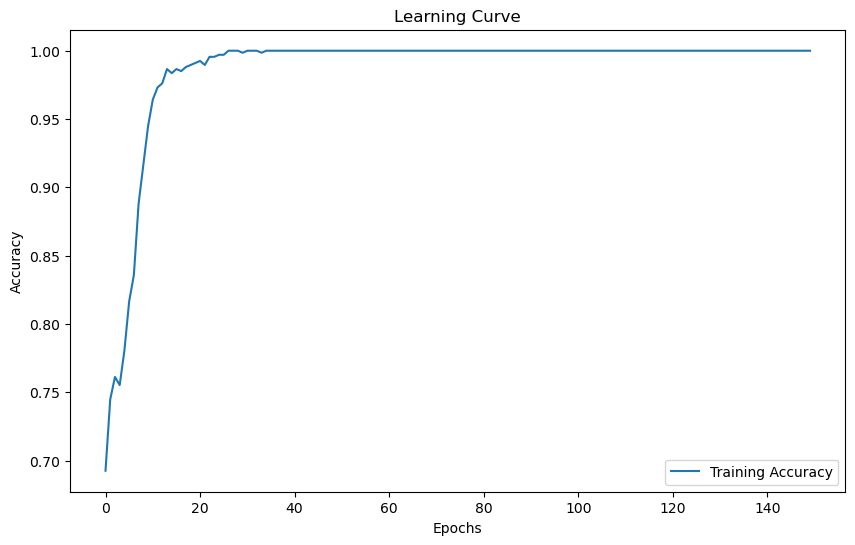

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Accuracy: 0.9965277777777778


In [182]:
import keras

# your code here
model1 = Sequential()
model1.add(Input(shape=(X_train.shape[-1], )))
# model1.add(Dense(50, activation='relu'))
model1.add(Dense(100, activation='relu'))
# model1.add(Dense(50, activation='relu'))
model1.add(Dense(2, activation='softmax'))  # True or Falss

custom_adam = keras.optimizers.Adam(learning_rate=0.005)

model1.compile(optimizer=custom_adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model1.fit(X_train, y_train, epochs=150, verbose=2)

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

y_pred = model1.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Accuracy: {accuracy}')

**Which approach(es) did you find helpful to improve your model performance?**

In [183]:
# your answer here
# Following parameters helped me reach an accuracy above 0.99:

# Layers: I tried adding dense layers, but got the best results with a simple layer of 100 neurons.
# Making it more complex simply lowers the accuracy, showing that this is not needed.

# Learning rate: I tried different values between 0.01 and 0.001. 0.005 seems to help the model converge
# and reach a higher accuracy.

# Epochs: The model quickly reaches an accuracy of 98-99% after 20 epochs. While making the learning rate smaller,
# I had to train the model for longer and got the best accuracy this way (0.996)